<a href="https://colab.research.google.com/github/sri-vyshnavi-jakkam/Project1/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



LOGISTIC REGRESSION
Accuracy: 0.8421052631578947
[[27  8]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



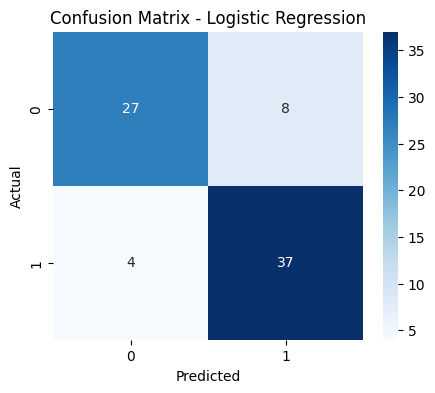

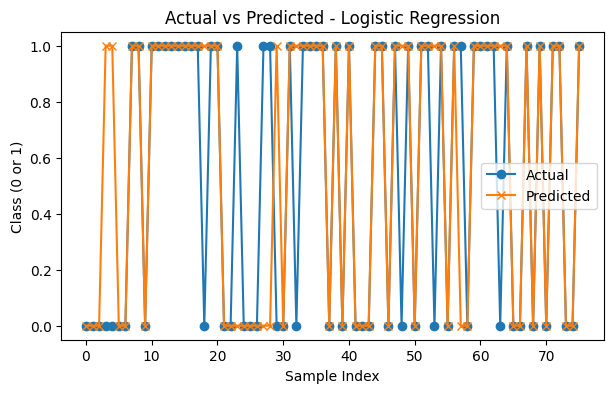



KNN
Accuracy: 0.8289473684210527
[[26  9]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.80      0.90      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



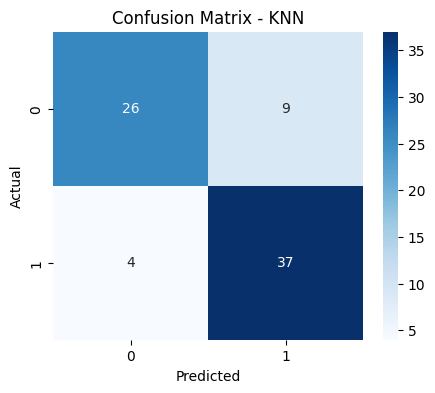

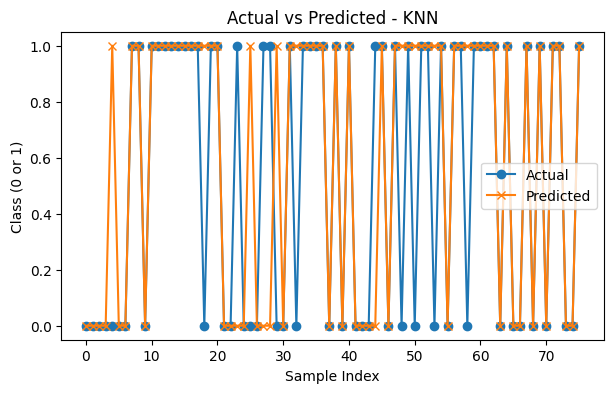



DECISION TREE
Accuracy: 0.7894736842105263
[[24 11]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



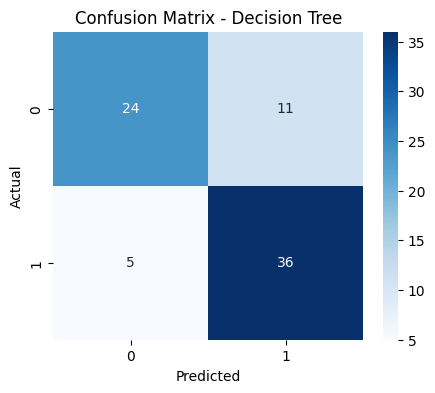

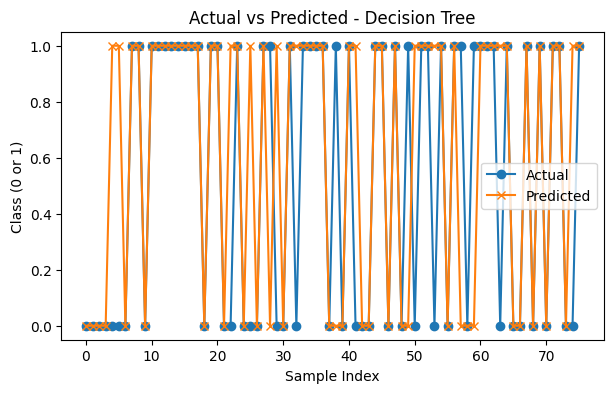



RANDOM FOREST
Accuracy: 0.7894736842105263
[[26  9]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.79      0.83      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



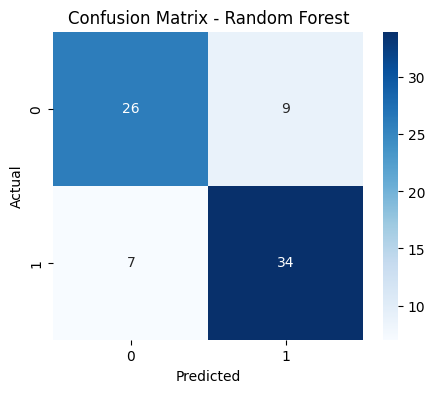

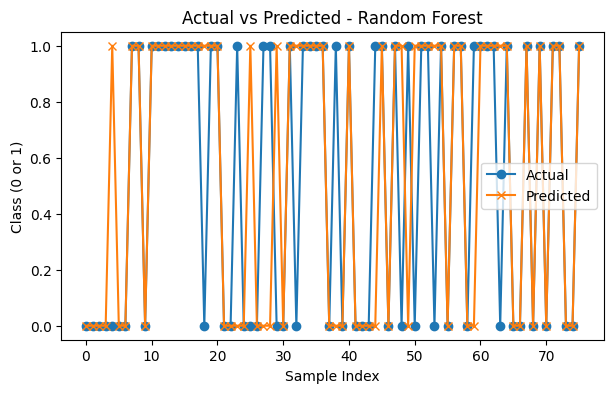



SVM
Accuracy: 0.8157894736842105
[[26  9]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.80      0.88      0.84        41

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



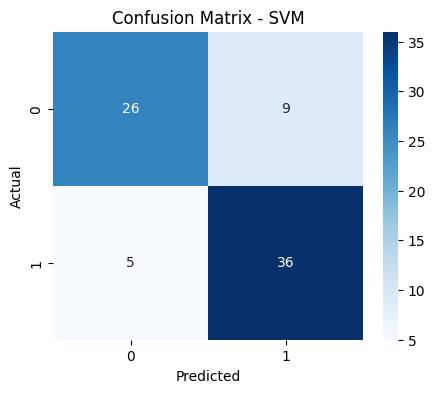

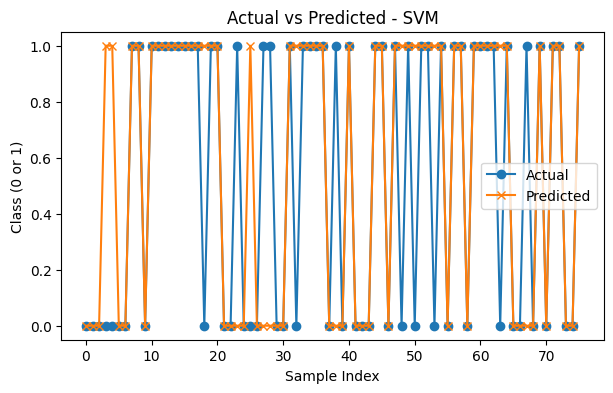



ADABOOST
Accuracy: 0.9078947368421053
[[31  4]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



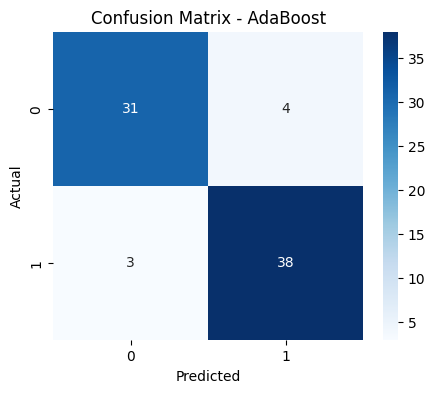

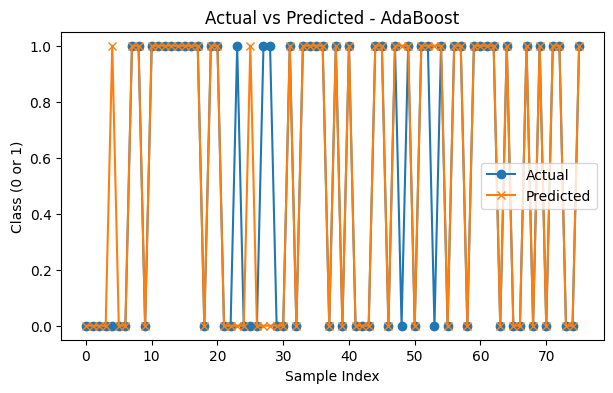

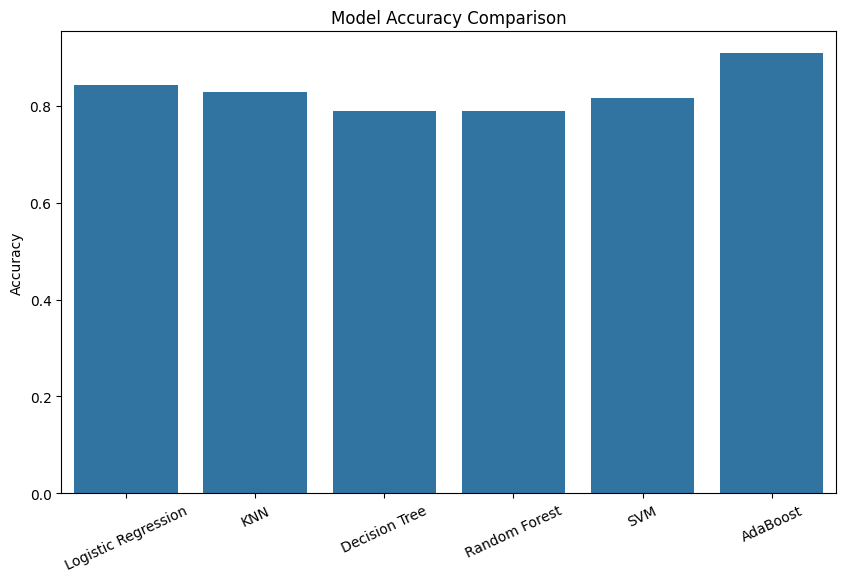


Best Model: AdaBoost (90.79%)

The patient is likely to have Coronary Artery Disease.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv(r"/content/heart_disease_data.csv")
data = data.drop_duplicates()
data = data.fillna(data.mean())

# Split
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_conf_matrix(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Function to plot Actual vs Predicted
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(7,4))
    plt.plot(range(len(y_test)), y_test, marker='o', label='Actual')
    plt.plot(range(len(y_pred)), y_pred, marker='x', label='Predicted')
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("Class (0 or 1)")
    plt.legend()
    plt.show()


# MODELS
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
}

accuracy_results = {}

for name, model in models.items():
    print("\n")
    print(name.upper())

    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print("Accuracy:", acc)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plot_conf_matrix(cm, name)

    # Plot Actual vs Predicted
    plot_actual_vs_predicted(y_test, y_pred, name)

# ACCURACY BAR GRAPH
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=25)
plt.show()

# BEST MODEL
best_model_name = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest Model: {best_model_name} ({accuracy_results[best_model_name]*100:.2f}%)")

best_model = models[best_model_name]

# SAMPLE PREDICTION
sample_df = pd.DataFrame(
    [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]],
    columns=X.columns
)
sample_scaled = scaler.transform(sample_df)
prediction = best_model.predict(sample_scaled)

if prediction[0] == 1:
    print("\nThe patient is likely to have Coronary Artery Disease.")
else:
    print("\nThe patient is NOT likely to have Coronary Artery Disease.")
